# project : Investigate a dataset

I have choosed TMDb movie data to investigate for this project


1. Which genres are the most popular from year to year?
2. What kinds of properties are associated with movies that have high revenues?
3. Ralation between budget and revenue.
4. popularity of movie based on production company.
5. common cast name.

## Import the required libraries
 

In [60]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn
import pandas as pd

In [61]:
#read the csv file using pandas read_csv
tmdb_df = pd.read_csv("tmdb-movies.csv")
tmdb_df.tail(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.000000,0.0
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000,0.0
10865,22293,tt0060666,0.035919,19000,0,Manos: The Hands of Fate,Harold P. Warren|Tom Neyman|John Reynolds|Dian...,NaN,Harold P. Warren,It's Shocking! It's Beyond Your Imagination!,...,A family gets lost on the road and stumbles up...,74,Horror,Norm-Iris,11/15/66,15,1.5,1966,127642.279154,0.0


## Fixing the data types

  we are using pandas DataFrame here so we don't need to fix the nan values.
  Here we create some new dataframe in `higher_value_data` for perticular values needed.

1 Which genres are the most popular from year to year?
    
   The answer to this quetion is Drama.

In [62]:
#this function takes the input of file name and returns the name of the most popular genres
def most_popular_genres(file_name):
    genres = file_name["genres"].str.cat(sep="|").split("|")
    table=pd.Series(genres).value_counts(ascending=True)[-10:]
    print table.idxmax()
    
most_popular_genres(tmdb_df)


Drama


 2 What kinds of properties are associated with movies that have high revenues?
    
    The high revenue movies are mostly adventure type and has mean of revenue 39823319.7934 ,mean budget 14625701.0941 and mean popularity 0.64644095196.

In [63]:
#arr_data takes the input of file name and field of which we want array and it returns that array
def arr_data(file_name,feild):
    arr_data = []
    for data_point in file_name.loc[:,feild]:
        arr_data.append(data_point)
    return arr_data
std_of_revenue = np.std(arr_data(tmdb_df,"revenue"))
# higher_value_data takes the input of file name,field name and standard deviation of the field
# and returns the most higher value of that feild which is higher than 10 standard deviation of 
# the given field
def higher_value_data(file_name,feild,std):
    properties = []
    df = pd.DataFrame()
    for data_point in file_name.loc[:,feild]:
            if data_point > (10.0*std):
                properties.append(file_name.loc[file_name[feild] == data_point])
    return df.append(properties)

most_popular_genres(higher_value_data(tmdb_df,"revenue",std_of_revenue))
revenue = arr_data(tmdb_df,"revenue")
budget = arr_data(tmdb_df,"budget")
popularity = arr_data(tmdb_df,"popularity")


Adventure


Mean: 39823319.7934
Standard deviation: 116998102.532
Minimum: 0
Maximum: 2781505847


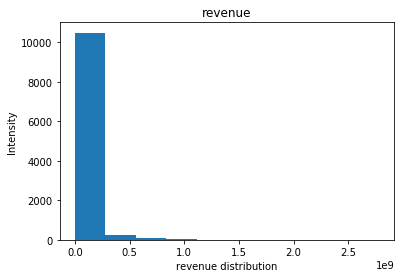

Mean: 14625701.0941
Standard deviation: 30911791.3243
Minimum: 0
Maximum: 425000000


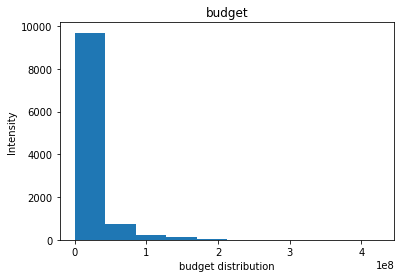

Mean: 0.64644095196
Standard deviation: 1.00013890965
Minimum: 6.5e-05
Maximum: 32.985763


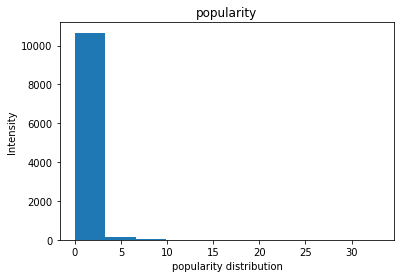

In [64]:
#this function gives the discription of data field and visualization of data
def data_description(data,title):
    print 'Mean:', np.mean(data)
    print 'Standard deviation:', np.std(data)
    print 'Minimum:', np.min(data)
    print 'Maximum:', np.max(data)
    plt.title(title)
    plt.xlabel("{} distribution".format(title))
    plt.ylabel("Intensity")
    plt.hist(data)
    plt.show()
data_description(revenue,"revenue")
data_description(budget,"budget")
data_description(popularity,"popularity")

3 Ralation between budget and revenue.

   The visual relation of budget and revenue is roughly similer, mean relation is as shown in above code which is mean of revenue is 39823319.7934 ,mean of budget is 14625701.0941

    

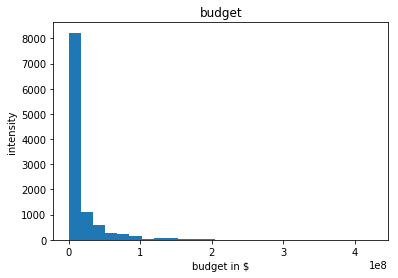

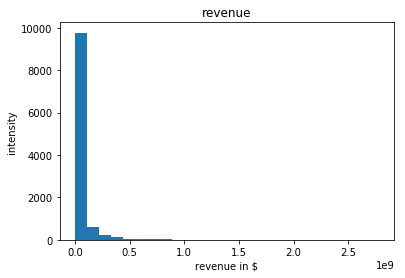

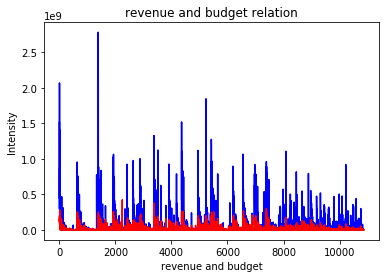

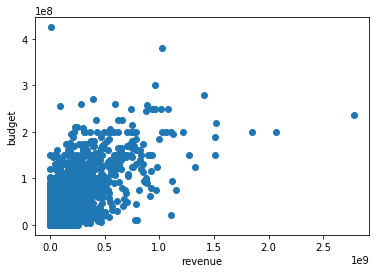

In [65]:
#here we visulaized the data of budget and revenue.
%matplotlib inline
plt.title("budget")
plt.xlabel("budget in $")
plt.ylabel("intensity")
plt.hist(budget,bins = 25)
plt.show()
plt.title("revenue")
plt.xlabel("revenue in $")
plt.ylabel("intensity")
plt.hist(revenue,bins = 25)
plt.show()
plt.title("revenue and budget relation")
plt.xlabel("revenue and budget")
plt.ylabel("Intensity")
plt.plot(revenue,c = "blue")
plt.plot(budget,c = "red")

plt.show()
plt.xlabel("revenue")
plt.ylabel("budget")
plt.scatter(revenue,budget)

4  popularity of movie based on production company.

   High popularity movies has the following production companies

In [66]:
std_of_popularity = np.std(popularity)
#here we get the series of production companies base on high popularity where the number shows 
#the movies by the production companies with high popularity
popularity = higher_value_data(tmdb_df,"popularity",std_of_popularity)["production_companies"].str.cat(sep="|").split("|")
table=pd.Series(popularity).value_counts(ascending=True)[-10:]
print table
        

Syncopy                    1
Bad Robot                  1
Summit Entertainment       1
Fuji Television Network    1
Lynda Obst Productions     1
Color Force                1
Lucasfilm                  2
Marvel Studios             2
Legendary Pictures         2
Warner Bros.               2
dtype: int64


5 common cast name
    
   The most comman cast names are as given below ,among all of them `Robert De Niro` is most common actor with his name in `72` movies.

Liam Neeson          48
John Goodman         49
Morgan Freeman       49
John Cusack          50
Robin Williams       51
Michael Caine        53
Nicolas Cage         61
Bruce Willis         62
Samuel L. Jackson    71
Robert De Niro       72
dtype: int64


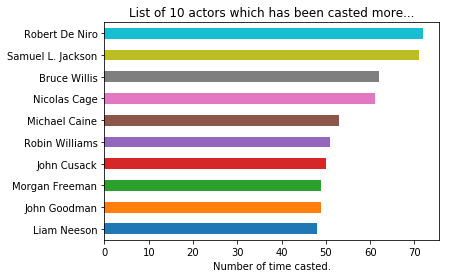

In [67]:
actor = tmdb_df["cast"].str.cat(sep="|").split("|")

table=pd.Series(actor).value_counts(ascending=True)[-10:]
graph = table.plot.barh()
graph.set(title = "List of 10 actors which has been casted more...",xlabel = "Number of time casted.")
print table


## Conclusion

We conclude that the revenue and budget of the data is roughly similar. As per our analysis most casted actor has no realtion with revenue.
In high revenue movie genres are Adventure.
The limitation of this dataset is that it has some missing values or nan values which can affect the data description values like mean ,meadian, standard deviation etc.
This data set is from long period which in this case affect the revenue and budget of the movie data
there are other factors which can affect the success of the movie.
We got name of the actors contributed most in film industry and the production companies with most popular movies